In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [46]:
df=pd.read_csv("pima-indians-diabetes .csv")

In [47]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
df.set_axis(['pregnancies','glucose','bloodpressure','skinthickness','insulin','bmi','diabetespedigreefuncton','age','class'],axis=1,inplace=True)

In [49]:
df.shape

(768, 9)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pregnancies              768 non-null    int64  
 1   glucose                  768 non-null    int64  
 2   bloodpressure            768 non-null    int64  
 3   skinthickness            768 non-null    int64  
 4   insulin                  768 non-null    int64  
 5   bmi                      768 non-null    float64
 6   diabetespedigreefuncton  768 non-null    float64
 7   age                      768 non-null    int64  
 8   class                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [51]:
df.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefuncton,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [52]:
df.isnull().sum()

pregnancies                0
glucose                    0
bloodpressure              0
skinthickness              0
insulin                    0
bmi                        0
diabetespedigreefuncton    0
age                        0
class                      0
dtype: int64

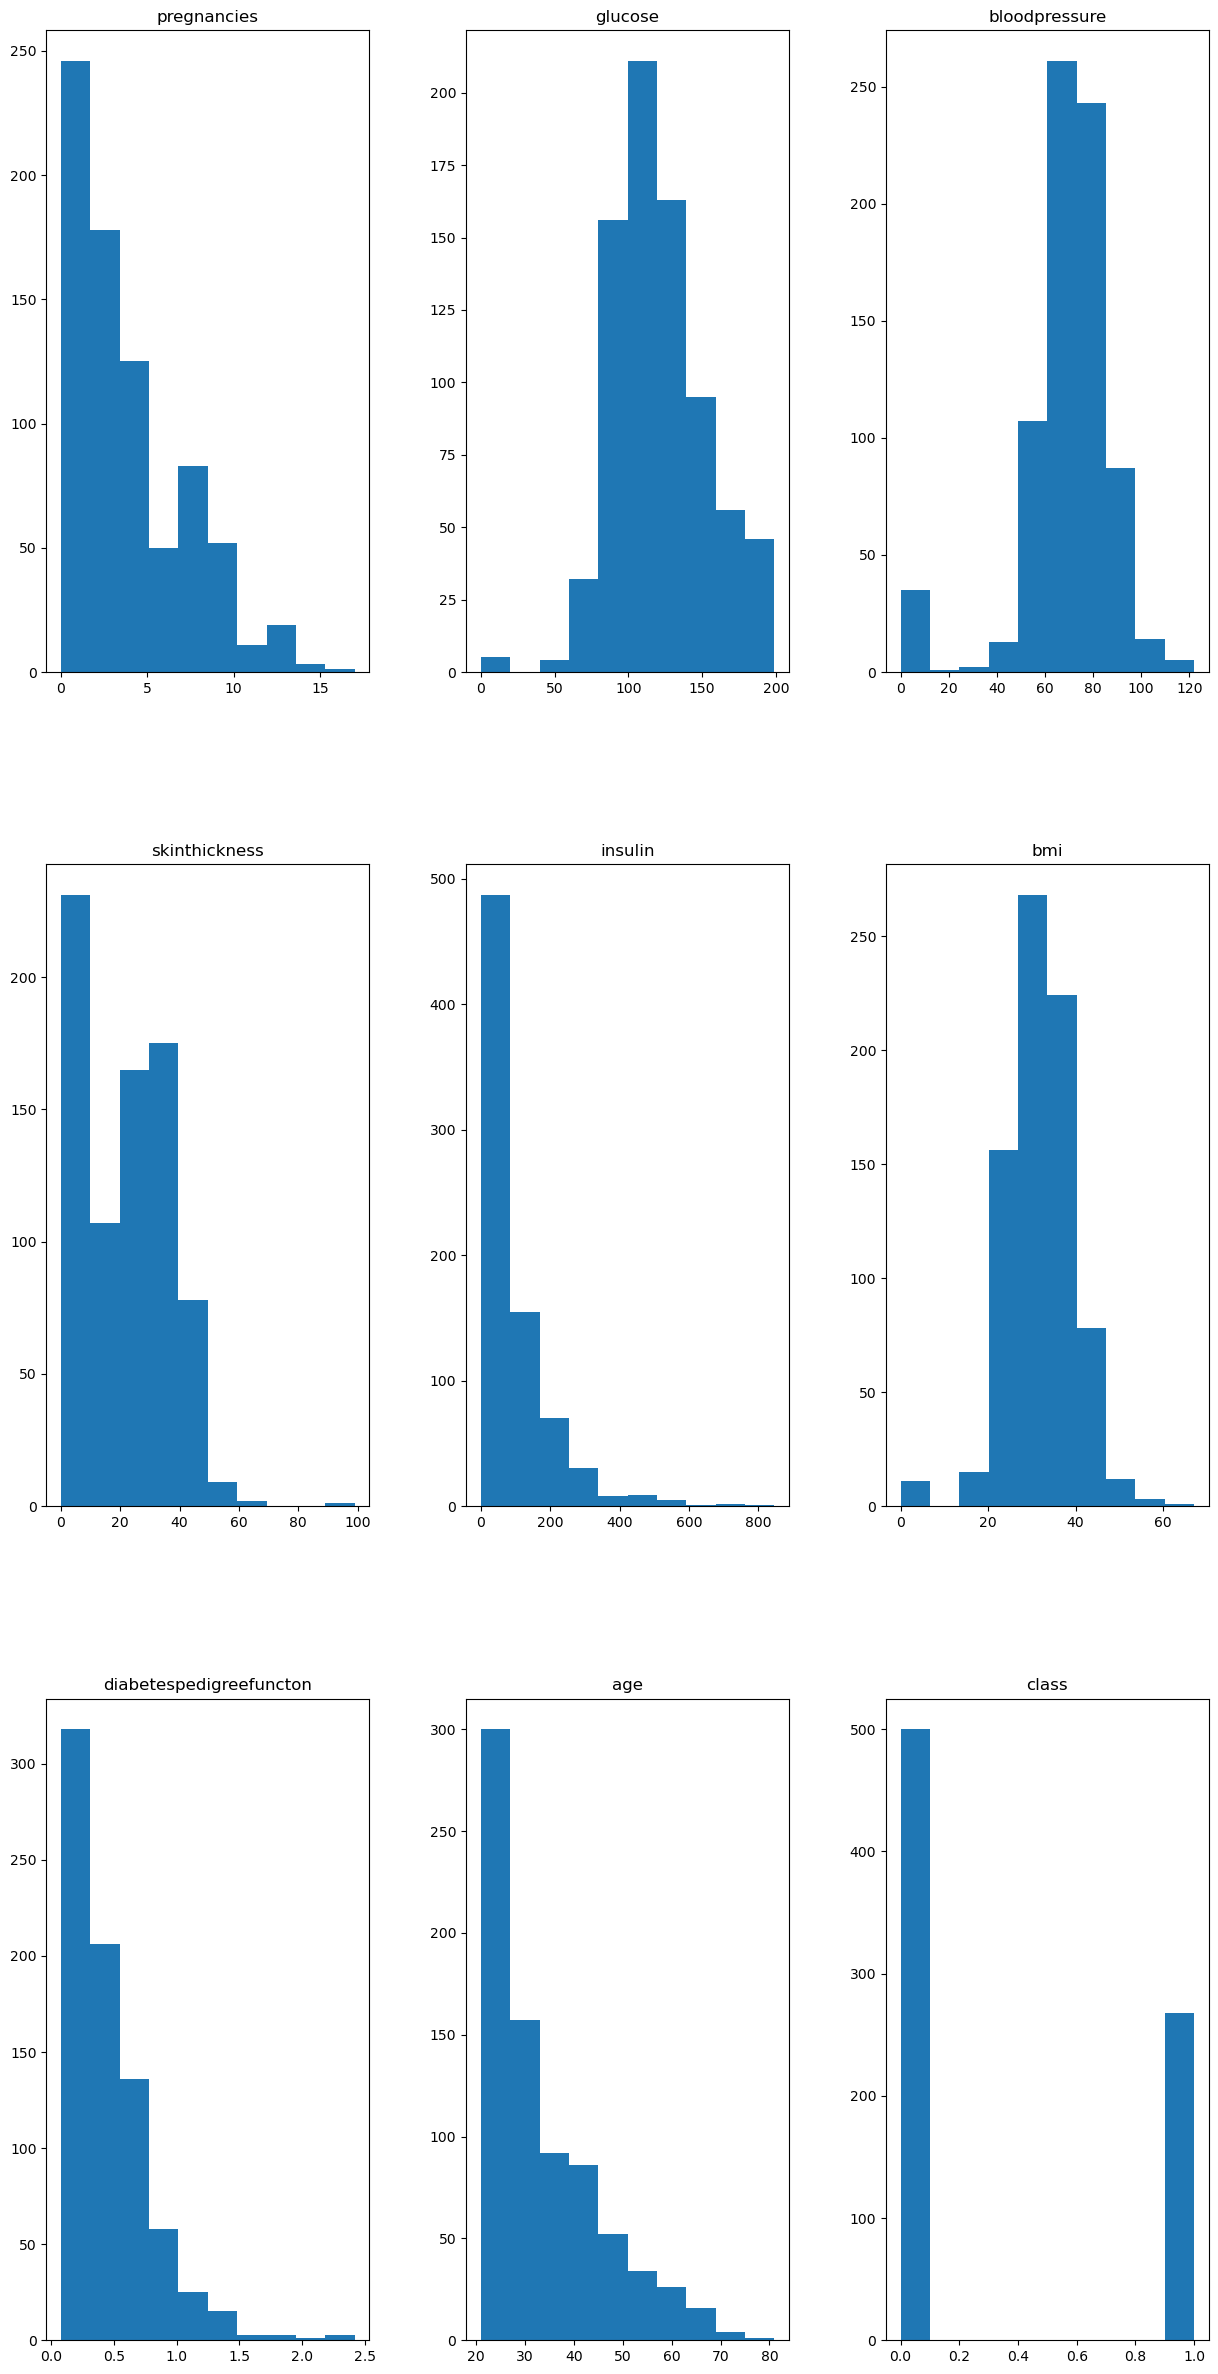

In [53]:
df.hist(figsize=(15,30), sharex=False,sharey=False,grid=False)
plt.show()

In [54]:
df.skew()

pregnancies                0.901674
glucose                    0.173754
bloodpressure             -1.843608
skinthickness              0.109372
insulin                    2.272251
bmi                       -0.428982
diabetespedigreefuncton    1.919911
age                        1.129597
class                      0.635017
dtype: float64

In [55]:
df.corr()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefuncton,age,class
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bloodpressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skinthickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetespedigreefuncton,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


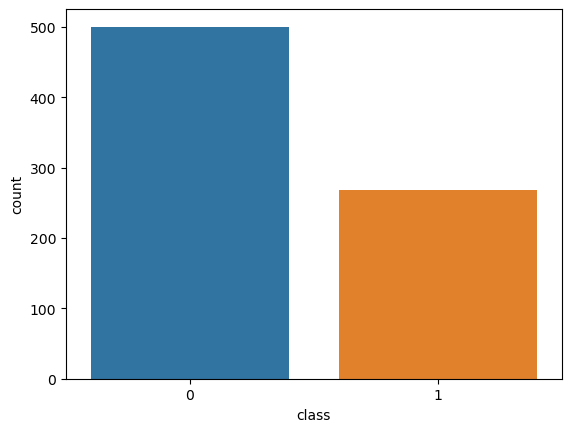

In [56]:
sns.countplot(x="class",data=df)
plt.show()


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x=df.drop("class",axis=1)
y=df["class"].values

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
reg =LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [62]:
reg.score(x_test,y_test)

0.8246753246753247

In [63]:
reg.score(x_train,y_train)

0.7719869706840391